#📌 Extracción

In [38]:
import pandas as pd
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos_crudos = pd.read_json(url)
datos_crudos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [39]:
d_customer = pd.json_normalize(datos_crudos['customer'])
d_phone = pd.json_normalize(datos_crudos['phone'])
d_internet = pd.json_normalize(datos_crudos['internet'])
d_account = pd.json_normalize(datos_crudos['account'])

datos_conc = pd.concat([datos_crudos[['customerID','Churn']], d_customer, d_phone, d_internet, d_account], axis = 1)
datos_conc

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [40]:
datos_conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Diccionario de datos
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [41]:
datos_conc['Charges.Total'] = pd.to_numeric(datos_conc['Charges.Total'], errors='coerce')
datos_conc['Charges.Total'].isna().sum()

np.int64(11)

In [42]:
datos = datos_conc.dropna(subset=['Charges.Total'])

datos['Charges.Total'].isna().sum()

np.int64(0)

In [43]:
datos['Cuentas_Diarias'] = datos['Charges.Monthly']/30
datos.head()

/tmp/ipython-input-98895944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Cuentas_Diarias'] = datos['Charges.Monthly']/30


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [44]:
datos = datos.applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)

In [45]:
datos = datos.fillna(0)

In [46]:
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [47]:
datos['MultipleLines'].unique()

array([0, 1, 'No phone service'], dtype=object)

In [49]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [50]:
datos['Churn'].unique()

array([0, 1, ''], dtype=object)

In [51]:
datos['Churn'] = datos['Churn'].replace({'':0}).astype(int)
datos['Churn'].unique()

array([0, 1])

In [52]:
print(datos.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


In [53]:
datos = datos.rename(columns={
    'CustomerID': 'id_cliente',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_con_compania',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturacion_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'facturacion_mensual',
    'Charges.Total': 'facturacion_total',
    'Cuentas_Diarias': 'cuentas_diarias'
})

In [54]:
datos.head()

,customerID,abandono,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_con_compania,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,facturacion_mensual,facturacion_total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [55]:
datos.describe()

,abandono,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_con_compania,servicio_telefonico,facturacion_electronica,facturacion_mensual,facturacion_total,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


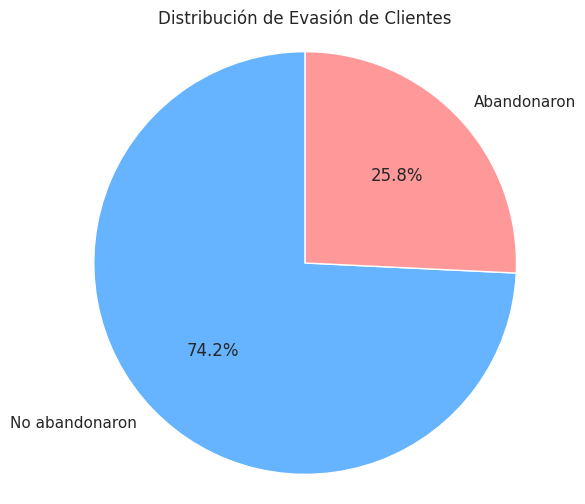

In [56]:
conteo_abandono = datos['abandono'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(conteo_abandono, labels=['No abandonaron', 'Abandonaron'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribución de Evasión de Clientes')
plt.axis('equal')
plt.show()

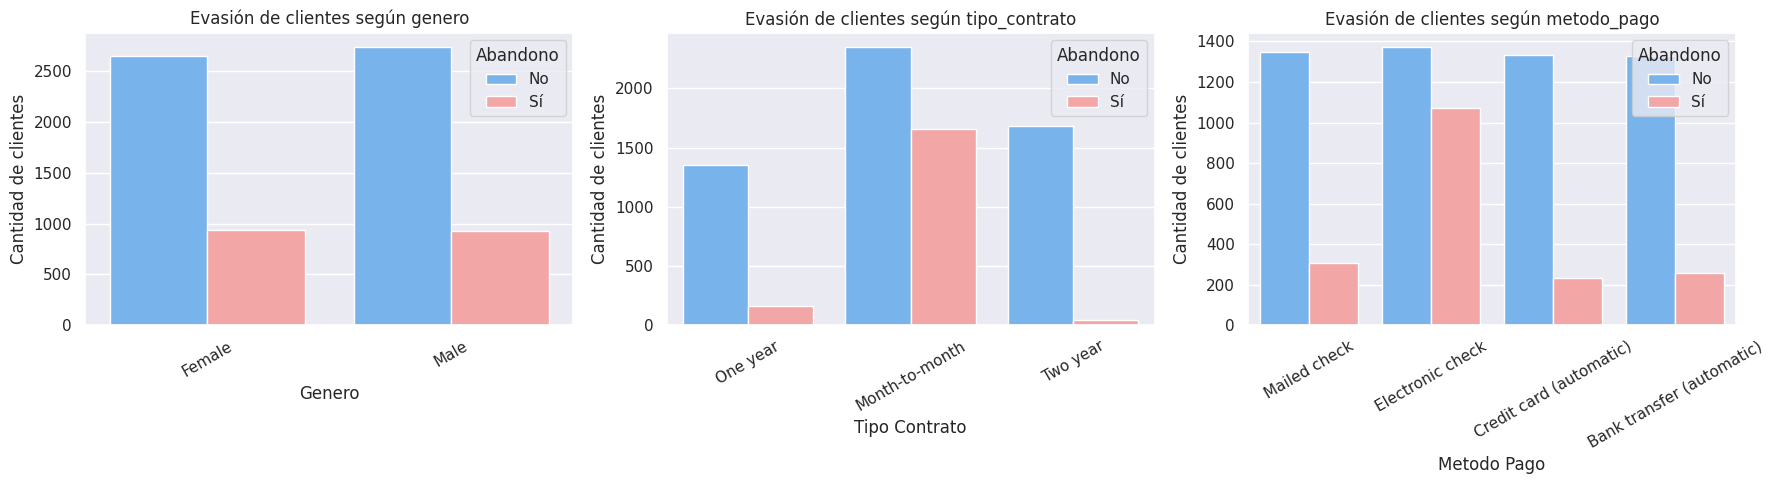

In [57]:
sns.set(font_scale=1.0)

variables_categoricas = ['genero', 'tipo_contrato', 'metodo_pago']

fig, axes = plt.subplots(1, len(variables_categoricas), figsize=(len(variables_categoricas)*6, 5))

if len(variables_categoricas) == 1:
    axes = [axes]

for ax, var in zip(axes, variables_categoricas):
    sns.countplot(data=datos, x=var, hue='abandono', palette=['#66b3ff', '#ff9999'], ax=ax)
    ax.set_title(f'Evasión de clientes según {var}')
    ax.set_xlabel(var.replace('_', ' ').title())
    ax.set_ylabel('Cantidad de clientes')
    ax.legend(title='Abandono', labels=['No', 'Sí'])
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

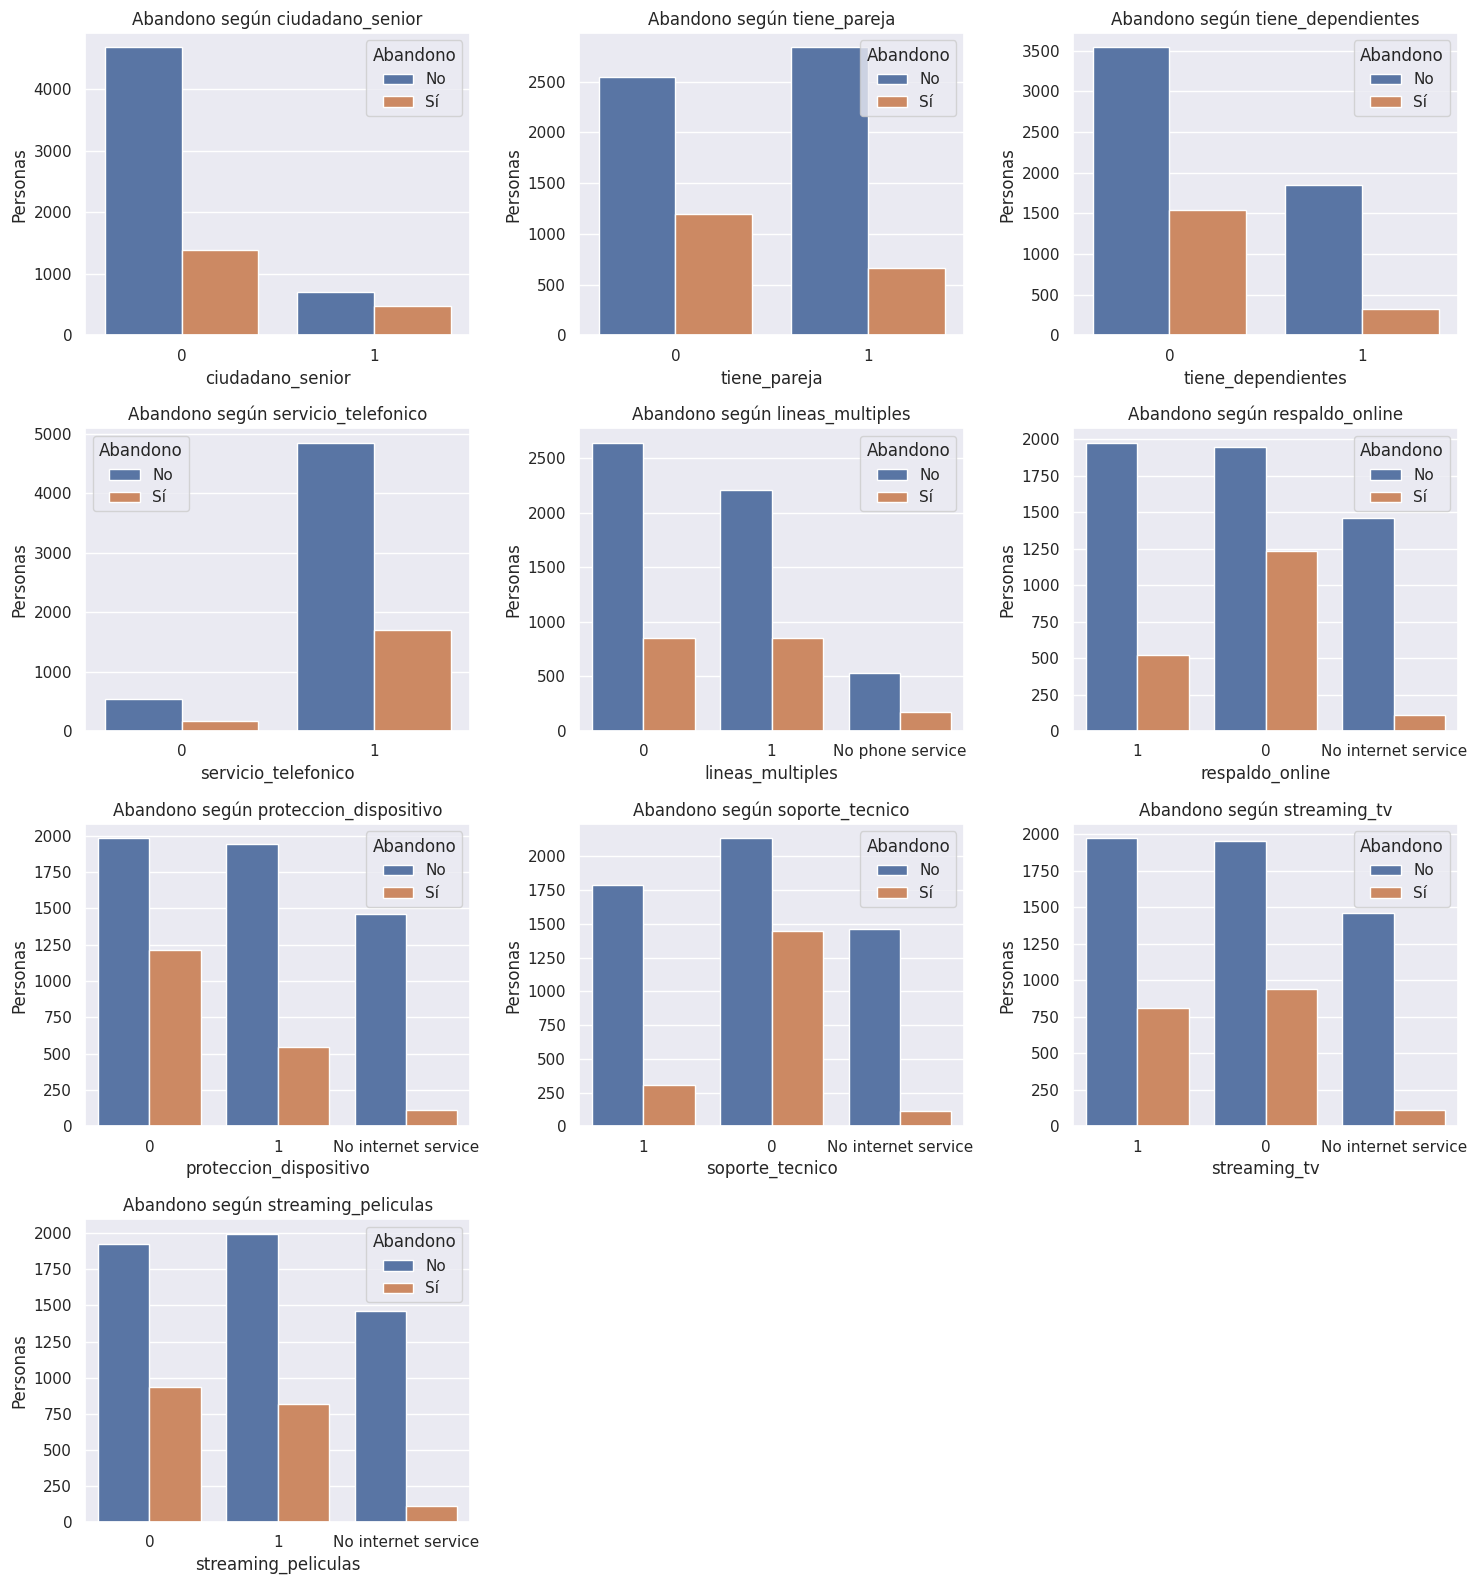

In [61]:

columnas_bi = ['ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'lineas_multiples',
               'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

graficos_por_fila = 3

filas = math.ceil(len(columnas_bi) / graficos_por_fila)

fig, axes = plt.subplots(filas, graficos_por_fila, figsize=(graficos_por_fila * 5, filas * 4))

axes = axes.flatten()

for i, col in enumerate(columnas_bi):
    sns.countplot(x=col, hue='abandono', data=datos, ax=axes[i])
    axes[i].set_title(f'Abandono según {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Personas')
    axes[i].legend(title='Abandono', labels=['No', 'Sí'])

for j in range(len(columnas_bi), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#📄Informe final

# Introducción

El presente informe dará a conocer un análisis en cuanto a el número de clientes que abandonaron un servicio. esto con el objetivo de comprender el "por qué" de su "cancelación" del servicio para tomar medidas al respecto y retener a los clientes, y en el proceso, acceder a nuevos.

# Limpieza y Tratamiento de Datos:

En un principio se tuvo un archivo json con datos "agrupados" en columnas, se procedió a "extender" los datos, dando lugar a un total de 7267 registros, de los cuales quedaron un total de 7256 ya que se eliminaron los registros donde prácticamente el cliente no pagó un valor alguno.

Los datos fueron estandarizados.

# Análisis exploratorio de datos

Basado en los análisis de los gráficos obtenidos de las diferentes variables, se tiene:

- Alrededor del 25.8% de los clientes abandonaron los servicios de la empresa.
- El genero no es un factor determinante para el abandono del servicio.
- Los clientes que tienen un menor tiempo con la empresa (antiguedad menor a 1 año), tienden an abandonar sus servicios
- Las personas que optan por pagar por un cheque electrónico tienden a abandonar los servicio.
- Algunas variables en el abandono del servicio serían si el cliente es de avanzada edad, si no ha tenido pareja, si depende de alguien, por el servicio telefónico, servicio de respaldo online, protección de dispositivos y streaming de películas, todo esto se obtiene basandonos en que los números superan los 1000 clientes que abandonan el servicio.

# Conclusión y recomendación

En base a los análisis presentados, se recomienda evaluar el método de pago relacionado a "cheque eléctronico", es posible que presente problemas y es por esto que los clientes abandonan el servicio, una posibilidad sería eliminar este método.

Se recomienda también evaluar los servicios que se ofrecen, principalmente los relacionados a:

- Servicio telefónico.
- Servicio de respaldo online.
- Servicio de protección de dispositivos.
- Servicio de streaming de películas.

Estos prodrían estar presentando fallos, el cual podría ser un posible motivo por el que los clientes abandonan los servicios de la empresa.